- nama: Dimas Aditya Susetyo
- NIM: 2602164660

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pickle as pkl

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## **Import Data**

In [2]:
df = pd.read_csv('data_1C.csv')
df.head(5)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


In [3]:
df.shape

(8237, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8237 non-null   int64  
 1   age          8237 non-null   int64  
 2   job          8227 non-null   object 
 3   marital      8237 non-null   object 
 4   education    8237 non-null   object 
 5   default      8237 non-null   object 
 6   housing      8237 non-null   object 
 7   loan         8237 non-null   object 
 8   contact      8237 non-null   object 
 9   month        8237 non-null   object 
 10  day_of_week  8237 non-null   object 
 11  duration     8222 non-null   float64
 12  campaign     8237 non-null   int64  
 13  pdays        8237 non-null   int64  
 14  previous     8237 non-null   int64  
 15  poutcome     8237 non-null   object 
 16  y            8237 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


## **cek & handle duplicated value**

In [5]:
df.duplicated().sum()

0

tidak ada duplicated value

## **handle missing values**

In [6]:
df.isna().sum()

Unnamed: 0      0
age             0
job            10
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration       15
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

### **cek tipe data dan unique val missing value**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8237 non-null   int64  
 1   age          8237 non-null   int64  
 2   job          8227 non-null   object 
 3   marital      8237 non-null   object 
 4   education    8237 non-null   object 
 5   default      8237 non-null   object 
 6   housing      8237 non-null   object 
 7   loan         8237 non-null   object 
 8   contact      8237 non-null   object 
 9   month        8237 non-null   object 
 10  day_of_week  8237 non-null   object 
 11  duration     8222 non-null   float64
 12  campaign     8237 non-null   int64  
 13  pdays        8237 non-null   int64  
 14  previous     8237 non-null   int64  
 15  poutcome     8237 non-null   object 
 16  y            8237 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


In [8]:
df['job'].unique()

array(['technician', 'admin.', 'blue-collar', 'services', 'entrepreneur',
       'self-employed', 'unemployed', 'retired', 'management', 'student',
       'unknown', 'housemaid', nan], dtype=object)

In [9]:
df['job'].value_counts()

job
admin.           2046
blue-collar      1860
technician       1375
services          777
management        625
retired           339
self-employed     293
entrepreneur      279
unemployed        201
housemaid         188
student           181
unknown            63
Name: count, dtype: int64

In [10]:
np.mean(df['duration'])

260.1893699829725

### **handle missing values**

In [11]:
#untuk handle df['job'], isi dengan df['job'] = unknown

df['job'].fillna('unknown', inplace=True)

In [12]:
#untuk handle df['duration'], isi dengan nilai rata2

df['duration'].fillna(np.mean(df['duration']), inplace=True)

### **cek kembali hasil kerja**

In [13]:
df.isna().sum()

Unnamed: 0     0
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

## **buang kolom yang ga berpengaruh**

In [14]:
#kita akan drop column yang ga terlalu guna untuk fungsi prediksi

unless = ['Unnamed: 0', 'month', 'day_of_week']
df.drop(columns=unless, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8237 non-null   int64  
 1   job        8237 non-null   object 
 2   marital    8237 non-null   object 
 3   education  8237 non-null   object 
 4   default    8237 non-null   object 
 5   housing    8237 non-null   object 
 6   loan       8237 non-null   object 
 7   contact    8237 non-null   object 
 8   duration   8237 non-null   float64
 9   campaign   8237 non-null   int64  
 10  pdays      8237 non-null   int64  
 11  previous   8237 non-null   int64  
 12  poutcome   8237 non-null   object 
 13  y          8237 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 901.0+ KB


## **informasi kolom kategorikal dan numerik**

In [16]:
numeric = []
categorical = []

for i in df.columns:
  if df[i].dtypes != object:
    numeric.append(i)
  else:
    categorical.append(i)

num_df = df[numeric]
cat_df = df[categorical]

In [17]:
#informasi kolom numerik

num_df.describe()

,age,duration,campaign,pdays,previous
count,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000
mean,40.000486,260.189370,2.555299,962.352434,0.172393
std,10.331078,254.710569,2.663180,187.221927,0.481973
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,104.000000,1.000000,999.000000,0.000000
50%,38.000000,184.000000,2.000000,999.000000,0.000000
75%,47.000000,324.000000,3.000000,999.000000,0.000000
max,98.000000,3284.000000,43.000000,999.000000,6.000000


In [50]:
#informasi kolom kategorikal

for i in cat_df.columns:
  print(cat_df[i].value_counts())
  print()

job
admin.           2046
blue-collar      1860
technician       1375
services          777
management        625
retired           339
self-employed     293
entrepreneur      279
unemployed        201
housemaid         188
student           181
unknown            73
Name: count, dtype: int64

marital
married     4943
single      2345
divorced     936
unknown       13
Name: count, dtype: int64

education
university.degree      2456
high.school            1902
basic.9y               1157
professional.course    1070
basic.4y                862
basic.6y                456
unknown                 328
illiterate                6
Name: count, dtype: int64

default
no         6533
unknown    1701
yes           3
Name: count, dtype: int64

housing
yes        4308
no         3730
unknown     199
Name: count, dtype: int64

loan
no         6890
yes        1148
unknown     199
Name: count, dtype: int64

contact
cellular     5253
telephone    2984
Name: count, dtype: int64

poutcome
nonexistent    

### **visualisasi informasi (buat numerikal aja)**

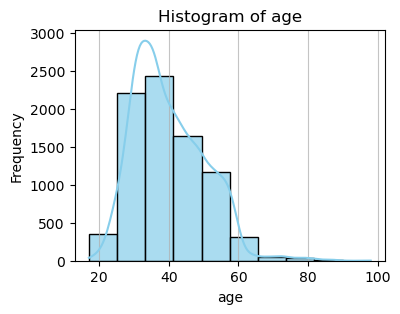

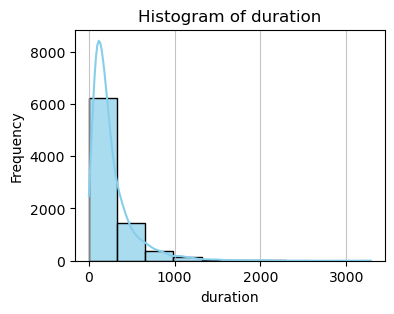

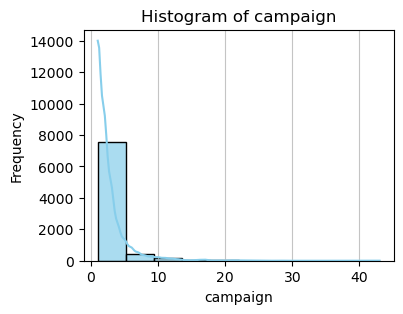

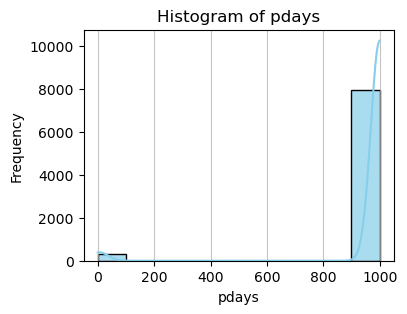

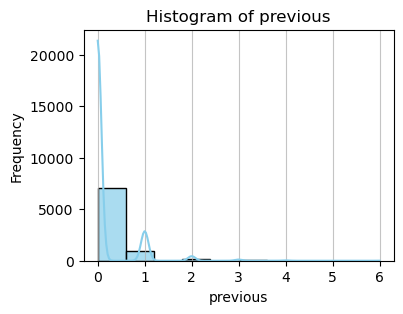

In [19]:
import seaborn as sns

for col in num_df.columns:
    plt.figure(figsize=(4, 3))  # Memperbesar gambar
    sns.histplot(num_df[col], bins=10, alpha=0.7, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='x', alpha=0.75)
    plt.show()

## **encoding (untuk data kategorikal)**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8237 non-null   int64  
 1   job        8237 non-null   object 
 2   marital    8237 non-null   object 
 3   education  8237 non-null   object 
 4   default    8237 non-null   object 
 5   housing    8237 non-null   object 
 6   loan       8237 non-null   object 
 7   contact    8237 non-null   object 
 8   duration   8237 non-null   float64
 9   campaign   8237 non-null   int64  
 10  pdays      8237 non-null   int64  
 11  previous   8237 non-null   int64  
 12  poutcome   8237 non-null   object 
 13  y          8237 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 901.0+ KB


In [21]:
cat_df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y'],
      dtype='object')

In [22]:
#pakai label encoding

label_encoding = LabelEncoder()
df['job'] = label_encoding.fit_transform(df['job'])
df['marital'] = label_encoding.fit_transform(df['marital'])
df['education'] = label_encoding.fit_transform(df['education'])
df['default'] = label_encoding.fit_transform(df['default'])
df['housing'] = label_encoding.fit_transform(df['housing'])
df['loan'] = label_encoding.fit_transform(df['loan'])
df['contact'] = label_encoding.fit_transform(df['contact'])
df['poutcome'] = label_encoding.fit_transform(df['poutcome'])

## **pisahkan train dan test**

In [23]:
#targetnya adalah y

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8237 non-null   int64  
 1   job        8237 non-null   int32  
 2   marital    8237 non-null   int32  
 3   education  8237 non-null   int32  
 4   default    8237 non-null   int32  
 5   housing    8237 non-null   int32  
 6   loan       8237 non-null   int32  
 7   contact    8237 non-null   int32  
 8   duration   8237 non-null   float64
 9   campaign   8237 non-null   int64  
 10  pdays      8237 non-null   int64  
 11  previous   8237 non-null   int64  
 12  poutcome   8237 non-null   int32  
 13  y          8237 non-null   object 
dtypes: float64(1), int32(8), int64(4), object(1)
memory usage: 643.6+ KB


In [24]:
df['y'].value_counts()

y
no     7303
yes     934
Name: count, dtype: int64

**encode si y**

In [25]:
label_encoding = LabelEncoder()
df['y'] = label_encoding.fit_transform(df['y'])

**pisahkan**

In [26]:
X = df.drop(columns=['y'])  
y = df['y']

In [27]:
y.head(2)

0    0
1    0
Name: y, dtype: int32

In [28]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
print('train data: ', x_train.shape)
print('test data: ', x_test.shape)

train data:  (6589, 13)
test data:  (1648, 13)


**do scaling data**

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

## **random forest**

In [32]:
x_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [33]:
from sklearn import set_config
set_config(print_changed_only = False)

In [34]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train_scale, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [35]:
y_RFpred = RF_class.predict(x_test_scale)

In [36]:
print('Classification Report')
print("Accuracy: %.2f%%"% (accuracy_score(y_test, y_RFpred) * 100))
print(classification_report(y_test, y_RFpred))

Classification Report
Accuracy: 90.17%
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1464
           1       0.78      0.17      0.28       184

    accuracy                           0.90      1648
   macro avg       0.84      0.58      0.61      1648
weighted avg       0.89      0.90      0.87      1648



## **SVM machine learning**

In [37]:
x_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [38]:
from sklearn import set_config
set_config(print_changed_only = False)

In [39]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Inisialisasi model SVM dengan kernel RBF
SVMmodel_RBF = SVC(kernel='rbf', probability=True, random_state=42)
SVMmodel_RBF.fit(x_train_scale, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
y_RBFpred = SVMmodel_RBF.predict(x_test_scale)

In [41]:
print('Classification Report')
print("Accuracy: %.2f%%"% (accuracy_score(y_test, y_RBFpred) * 100))
print(classification_report(y_test, y_RBFpred))

Classification Report
Accuracy: 89.81%
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1464
           1       0.60      0.27      0.37       184

    accuracy                           0.90      1648
   macro avg       0.75      0.62      0.66      1648
weighted avg       0.88      0.90      0.88      1648



## **Final result for choosing PKA files**

In [42]:
print("perbandingan prediksi dari kedua model")
print("Random Forest Accuracy: %.2f%%"% (accuracy_score(y_test, y_RFpred) * 100)) # Random Forest accuracy
print("SVM with RBF kernel Accuracy: %.2f%%"% (accuracy_score(y_test, y_RBFpred) * 100)) # SVM with RBF kernel accuracy

perbandingan prediksi dari kedua model
Random Forest Accuracy: 90.17%
SVM with RBF kernel Accuracy: 89.81%


berdasarkan perbandingan tersebut, tampak random forest memiliki hasil yang lebih besar jika dibandingkan dengan SVM dengan RBF kernel. maka dari itu, kita akan membuat PKA untuk model deploy dari model random forest

In [47]:
model = 'bestModz_RandomForest.pkl'
pkl.dump(RF_class, open(model, 'wb'))

scalerPKL = 'scaling.pkl'
pkl.dump(scaler, open(scalerPKL, 'wb'))

labelEncodePKL = 'label_encoding.pkl'
pkl.dump(label_encoding, open(labelEncodePKL, 'wb'))

In [48]:
df

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,29,9,2,2,0,2,0,0,648.0,1,999,0,1,0
1,31,0,2,6,0,0,0,0,295.0,1,999,0,1,0
2,27,1,2,2,0,2,0,1,236.0,2,999,0,1,0
3,30,7,1,7,0,0,0,1,143.0,3,999,0,1,0
4,32,9,1,6,0,0,0,0,155.0,1,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,33,0,2,6,0,0,0,1,147.0,1,999,0,1,0
8233,39,1,1,2,0,0,0,1,793.0,5,999,0,1,0
8234,36,0,1,6,0,2,0,1,120.0,2,999,0,1,0
8235,50,0,1,6,0,2,2,0,189.0,2,999,1,0,0


In [51]:
for i in x_train.columns:
  print(x_train[i].value_counts())
  print()

age
31    308
32    298
34    294
36    292
35    280
     ... 
17      2
85      2
98      1
87      1
84      1
Name: count, Length: 73, dtype: int64

job
0     1651
1     1498
9     1079
7      618
4      507
5      269
6      232
2      222
10     166
3      156
8      139
11      52
Name: count, dtype: int64

marital
1    3960
2    1854
0     763
3      12
Name: count, dtype: int64

education
6    1948
3    1548
2     917
5     853
0     694
1     364
7     260
4       5
Name: count, dtype: int64

default
0    5234
1    1353
2       2
Name: count, dtype: int64

housing
2    3457
0    2970
1     162
Name: count, dtype: int64

loan
0    5490
2     937
1     162
Name: count, dtype: int64

contact
0    4191
1    2398
Name: count, dtype: int64

duration
72.0      36
125.0     35
73.0      32
113.0     31
97.0      30
          ..
910.0      1
1080.0     1
2078.0     1
955.0      1
769.0      1
Name: count, Length: 954, dtype: int64

campaign
1     2818
2     1704
3      887
4      400


## Link Video

https://drive.google.com/file/d/1X2LHzFhtwI_F9E9SiBIdhaJvMcwYJtcK/view?usp=sharing;